## Baseline Scenario

Keep a running average for throughput (sensors and users) and a running average for age-of-info. 
- If the age-of-info is larger than threshold double the sensor BW and CPU. 
- If the throughput is less than threshold double BW/CPU for users.


In [1]:
import gymnasium as gym
import matplotlib.pyplot as plt

# predefined smart city scenario
from mobile_env.scenarios.smart_city import MComSmartCity

In [2]:
env = gym.make("mobile-smart_city-smart_city_handler-v0", render_mode="rgb_array")

print(f"\nSmart city environment with {env.NUM_USERS} users, {env.NUM_SENSORS} sensors and {env.NUM_STATIONS} cells.")


Smart city environment with 5 users, 20 sensors and 1 cells.


Time 99: Doubling Sensor BW and CPU due to high AoI mean    29.81
Name: total aori, dtype: float64


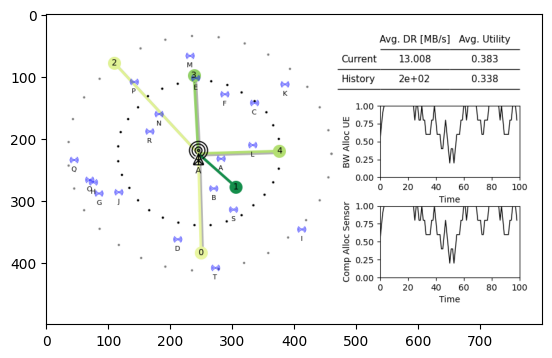

In [3]:
from IPython import display

# Parameters
aori_threshold = 20.0
throughput_threshold = 25.0

running_avg_aori = 0.0
running_avg_throughput_ue = 0.0

aori_alpha = 0.1
throughput_alpha = 0.1

dummy_action = [0.50, 0.50]
delta_change = 0.2

done = False
obs, info = env.reset()

for t in range(100):
    obs, reward, terminated, truncated, info = env.step(tuple(dummy_action))

    # Get metrics from the environment
    _, kpi_results, _, _, _ = env.monitor.load_results()
    current_aori = kpi_results["total aori"].iloc[-1]
    current_throughput_ue = kpi_results['total throughput ue'].iloc[-1]

    data = kpi_results.agg(['mean'])
    running_avg_aori = data["total aori"]
    running_avg_throughput_ue = data["total throughput ue"]

    # Adjust resources based on thresholds
    if current_aori > aori_threshold:
        print(f"Time {t}: Doubling Sensor BW and CPU due to high AoI {running_avg_aori}")
        dummy_action[0] = max(0, dummy_action[0] - delta_change)
        dummy_action[1] = max(0, dummy_action[1] - delta_change)

    if current_throughput_ue < throughput_threshold:
        print(f"Time {t}: Doubling User BW and CPU due to low throughput {running_avg_throughput_ue}")
        dummy_action[0] = min(1, dummy_action[0] + delta_change)
        dummy_action[1] = min(1, dummy_action[1] + delta_change)

    if terminated or truncated:
        break

    plt.imshow(env.render())
    display.display(plt.gcf())
    display.clear_output(wait=True)

In [4]:
scalar_results, kpi_results, ue_results, bs_results, ss_results = env.monitor.load_results()

scalar_results

,number UE connections,number sensor conncections,total traffic request ue,total traffic request sensor,delayed UE packets,delayed sensor packets,mean utility,mean utility sensor,mean datarate,mean datarate sensor
Time Step,,,,,,,,,,
0,5,20,32.605203,65.689287,0,0,0.039419,-0.675996,1.765301,1.098451e+00
1,5,20,33.776173,153.915281,0,0,0.106240,-0.814110,2.853920,5.716154e-01
2,5,20,44.897114,252.969569,0,0,0.170949,-0.950606,3.428594,4.728559e-02
3,5,20,61.216726,364.969569,0,0,0.205555,-1.000000,3.536078,1.000000e-10
4,5,20,76.122097,456.969569,1,0,0.211186,-1.000000,3.518171,1.000000e-10
...,...,...,...,...,...,...,...,...,...,...
95,5,20,1165.408822,7954.397753,3,0,0.461753,-1.000000,19.287144,1.000000e-10
96,5,20,1174.555478,8053.397753,1,0,0.453388,-1.000000,16.519145,1.000000e-10
97,5,20,1177.787031,8148.397753,1,0,0.447442,-1.000000,15.035081,1.000000e-10


In [5]:
kpi_results

,bw allocation UE,bw allocation sensor,comp. allocation UE,comp. allocation sensor,total delayed packets,reward,reward cumulative,total aori,total aosi,total throughput ue,total throughput sensor
Time Step,,,,,,,,,,,
0,0.5,0.5,0.5,0.5,0,0.00,0.00,0.0,0.0,8.394797,17.310713
1,0.7,0.3,0.7,0.3,0,9.50,9.50,1.0,1.0,13.829031,9.774006
2,0.9,0.1,0.9,0.1,0,19.50,29.00,3.0,1.0,9.879059,0.945712
3,1.0,0.0,1.0,0.0,0,0.00,29.00,0.0,0.0,17.680388,0.000000
4,1.0,0.0,1.0,0.0,1,22.10,51.10,7.0,7.0,16.094629,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
95,1.0,0.0,1.0,0.0,3,-10.60,-217.25,146.0,110.0,23.782011,0.000000
96,1.0,0.0,1.0,0.0,1,-0.82,-218.07,70.0,68.0,15.853345,0.000000
97,1.0,0.0,1.0,0.0,1,-1.23,-219.30,41.0,41.0,38.768446,0.000000


In [6]:
ue_results

Metric           AoRI  AoSI  distance UE-station  traffic request  \
Time Step UE ID                                                     
0         0       NaN   NaN            58.457556     5.242585e+00   
          1       NaN   NaN           110.874807     1.541312e+01   
          2       NaN   NaN           122.207981     0.000000e+00   
          3       NaN   NaN            94.300447     7.994481e+00   
          4       NaN   NaN            75.313075     3.955013e+00   
...               ...   ...                  ...              ...   
99        0      65.0  51.0            79.815138     4.456577e+02   
          1       0.0  14.0            38.566752     8.526513e-14   
          2      69.0  55.0            94.049429     4.908659e+02   
          3       NaN   NaN            63.562995     4.106205e+00   
          4      79.0  51.0            58.535843     2.340541e+02   

Metric           user datarate  user queue size  user throughput  user utility  
Time Step UE ID                                                                 
0         0           4.757415              1.0         4.757415      0.338686  
          1           0.586876              1.0         0.586876     -0.115727  
          2           0.431710              0.0         0.000000     -0.182404  
          3           1.005519              1.0         1.005519      0.001195  
          4           2.044987              1.0         2.044987      0.155345  
...                        ...              ...              ...           ...  
99        0           3.485186             46.0         3.485186      0.271113  
          1          42.410199              0.0        10.000000      0.813735  
          2           0.994136             46.0         0.994136     -0.001277  
          3           3.893795              1.0         3.893795      0.295187  
          4          10.315152             24.0        10.315152      0.506738  

[500 rows x 8 columns]

In [7]:
ss_results

Metric               distance sensor-station  sensor datarate  \
Time Step Sensor ID                                             
0         0                        16.492423         0.000000   
          1                        30.083218         0.000000   
          2                        57.280014         5.390609   
          3                        70.611614         2.659156   
          4                        61.032778         4.350737   
...                                      ...              ...   
99        15                       74.027022         0.000000   
          16                       89.140339         0.000000   
          17                       39.357337         0.000000   
          18                       51.478151         0.000000   
          19                       92.779308         1.057537   

Metric               sensor queue size  sensor throughput  sensor utility  \
Time Step Sensor ID                                                         
0         0                        1.0           0.000000       -1.000000   
          1                        1.0           0.000000       -1.000000   
          2                        1.0           5.390609        0.365819   
          3                        1.0           2.659156        0.212372   
          4                        1.0           4.350737        0.319281   
...                                ...                ...             ...   
99        15                      96.0           0.000000       -1.000000   
          16                      96.0           0.000000       -1.000000   
          17                      65.0           0.000000       -1.000000   
          18                      86.0           0.000000       -1.000000   
          19                      97.0           1.057537        0.012148   

Metric               traffic request  
Time Step Sensor ID                   
0         0                 3.000000  
          1                 2.000000  
          2                 1.609391  
          3                 1.340844  
          4                 1.649263  
...                              ...  
99        15              483.863479  
          16              485.894575  
          17              350.700777  
          18              405.683573  
          19              497.424634  

[2000 rows x 6 columns]

In [8]:
bs_results

,Metric,queue size accomplished UE jobs,queue size accomplished sensor jobs,queue size transferred UE jobs,queue size transferred sensor jobs
Time Step,BS ID,,,,
0,0,0,1,0,0
1,0,1,2,0,0
2,0,3,2,0,0
3,0,3,2,0,0
4,0,7,2,0,0
...,...,...,...,...,...
95,0,209,277,0,57
96,0,211,277,0,57
97,0,213,277,0,57


In [9]:
data = kpi_results.agg(['min', 'max', 'mean'])
data

,bw allocation UE,bw allocation sensor,comp. allocation UE,comp. allocation sensor,total delayed packets,reward,reward cumulative,total aori,total aosi,total throughput ue,total throughput sensor
min,0.200,0.000,0.200,0.000,0.00,-20.0000,-235.0200,0.00,0.00,1.801088,0.000000
max,1.000,0.800,1.000,0.800,4.00,26.1700,92.4100,213.00,171.00,54.997819,289.765979
mean,0.819,0.181,0.819,0.181,1.26,-2.3504,-109.4138,29.81,40.86,21.003161,17.590147


In [10]:
data = scalar_results.agg(['min', 'max', 'mean'])
data

,number UE connections,number sensor conncections,total traffic request ue,total traffic request sensor,delayed UE packets,delayed sensor packets,mean utility,mean utility sensor,mean datarate,mean datarate sensor
min,5.0,20.0,32.605203,65.689287,0.00,0.0,-0.411687,-1.000000,1.765301,1.000000e-10
max,5.0,20.0,1177.787031,8267.985316,4.00,15.0,0.546026,-0.477938,2531.228149,2.209772e+01
mean,5.0,20.0,641.449859,4355.527467,1.26,2.8,0.338181,-0.880740,198.225557,2.089919e+00


In [11]:
data = ue_results.reset_index()
data = data.groupby('UE ID').agg(['mean', 'min', 'max'])
data = data.drop('Time Step', axis='columns')
data

Metric       AoRI                   AoSI            distance UE-station  \
             mean   min   max       mean  min   max                mean   
UE ID                                                                     
0       24.440000   1.0  65.0  15.640000  0.0  51.0           86.195208   
1        8.016949   0.0  35.0  19.813559  1.0  66.0           47.532582   
2       47.550000  10.0  69.0  25.650000  0.0  55.0           89.953579   
3        4.018182   0.0  22.0  24.400000  0.0  68.0           49.517584   
4       19.078947   1.0  83.0  17.657895  1.0  51.0           72.798475   

Metric                        traffic request  ... user datarate  \
              min         max            mean  ...           max   
UE ID                                          ...                 
0       58.457556   99.946785      201.991112  ...      9.393295   
1        7.323860  110.874807       45.911283  ...  12612.388631   
2       77.179383  122.207981      264.437274  ...      4.105433   
3       26.206380   94.300447       18.969847  ...    165.920632   
4       58.535843   92.039596      110.140344  ...     10.315152   

Metric user queue size            user throughput                  \
                  mean  min   max            mean  min        max   
UE ID                                                               
0                21.13  0.0  47.0        2.583423  0.0   9.393295   
1                 4.69  0.0  15.0        6.840000  0.0  39.795223   
2                25.49  0.0  46.0        2.121341  0.0   4.105433   
3                 2.22  0.0  10.0        5.688938  0.0  18.000000   
4                12.27  0.0  28.0        3.769459  0.0  10.315152   

Metric user utility                 
               mean  min       max  
UE ID                               
0          0.148830 -1.0  0.486409  
1          0.601731 -1.0  1.000000  
2          0.130845 -1.0  0.306679  
3          0.551622 -1.0  1.000000  
4          0.257879 -1.0  0.506738  

[5 rows x 24 columns]

In [12]:
data = ss_results.reset_index()
data = data.groupby('Sensor ID').agg(['mean', 'min', 'max'])
data = data.drop('Time Step', axis='columns')
data

Metric    distance sensor-station                       sensor datarate       \
                             mean        min        max            mean  min   
Sensor ID                                                                      
0                       16.492423  16.492423  16.492423       28.895076  0.0   
1                       30.083218  30.083218  30.083218        4.269765  0.0   
2                       57.280014  57.280014  57.280014        0.485155  0.0   
3                       70.611614  70.611614  70.611614        0.212732  0.0   
4                       61.032778  61.032778  61.032778        0.391566  0.0   
5                       51.623638  51.623638  51.623638        0.612664  0.0   
6                       77.878110  77.878110  77.878110        0.191021  0.0   
7                       78.447435  78.447435  78.447435        0.223655  0.0   
8                       95.900991  95.900991  95.900991        0.094571  0.0   
9                       64.884513  64.884513  64.884513        0.318454  0.0   
10                      83.546394  83.546394  83.546394        0.135606  0.0   
11                      39.623226  39.623226  39.623226        1.309977  0.0   
12                      79.227520  79.227520  79.227520        0.144203  0.0   
13                      42.520583  42.520583  42.520583        1.474542  0.0   
14                      80.777472  80.777472  80.777472        0.135070  0.0   
15                      74.027022  74.027022  74.027022        0.181365  0.0   
16                      89.140339  89.140339  89.140339        0.121054  0.0   
17                      39.357337  39.357337  39.357337        1.722992  0.0   
18                      51.478151  51.478151  51.478151        0.773164  0.0   
19                      92.779308  92.779308  92.779308        0.105754  0.0   

Metric                sensor queue size            sensor throughput       \
                  max              mean  min   max              mean  min   
Sensor ID                                                                   
0          361.188452             14.53  0.0  45.0          4.750000  0.0   
1           47.441833             17.41  1.0  33.0          4.269765  0.0   
2            5.390609             47.12  1.0  93.0          0.485155  0.0   
3            2.659156             47.94  1.0  95.0          0.212732  0.0   
4            4.350737             47.85  1.0  94.0          0.391566  0.0   
5            7.658302             45.81  0.0  92.0          0.549498  0.0   
6            1.910211             49.19  1.0  97.0          0.191021  0.0   
7            1.863795             49.12  1.0  97.0          0.223655  0.0   
8            0.945712             49.38  1.0  98.0          0.094571  0.0   
9            3.538381             48.20  1.0  95.0          0.318454  0.0   
10           1.506732             48.97  1.0  97.0          0.135606  0.0   
11          18.713954             38.95  1.0  74.0          1.309977  0.0   
12           1.802542             49.55  1.0  98.0          0.144203  0.0   
13          14.745425             38.80  1.0  73.0          1.474542  0.0   
14           1.688376             49.34  1.0  97.0          0.135070  0.0   
15           2.267065             48.74  1.0  96.0          0.181365  0.0   
16           1.210543             48.94  1.0  96.0          0.121054  0.0   
17          19.144358             33.61  1.0  67.0          1.722992  0.0   
18           7.731643             44.41  1.0  86.0          0.773164  0.0   
19           1.057537             49.50  1.0  97.0          0.105754  0.0   

Metric                sensor utility                traffic request            \
                  max           mean  min       max            mean       min   
Sensor ID                                                                       
0          209.000000      -0.840000 -1.0  1.000000       66.820000  0.000000   
1           47.441833      -0.834573 -1.0  0.838081       79.40

In [13]:
data = bs_results.reset_index()
data = data.groupby('BS ID').agg(['mean', 'min', 'max'])
data = data.drop('Time Step', axis='columns')
data

Metric queue size accomplished UE jobs           \
                                  mean min  max   
BS ID                                             
0                               106.25   0  220   

Metric queue size accomplished sensor jobs           \
                                      mean min  max   
BS ID                                                 
0                                   121.03   1  284   

Metric queue size transferred UE jobs          \
                                 mean min max   
BS ID                                           
0                                0.04   0   2   

Metric queue size transferred sensor jobs          
                                     mean min max  
BS ID                                              
0                                   21.61   0  63

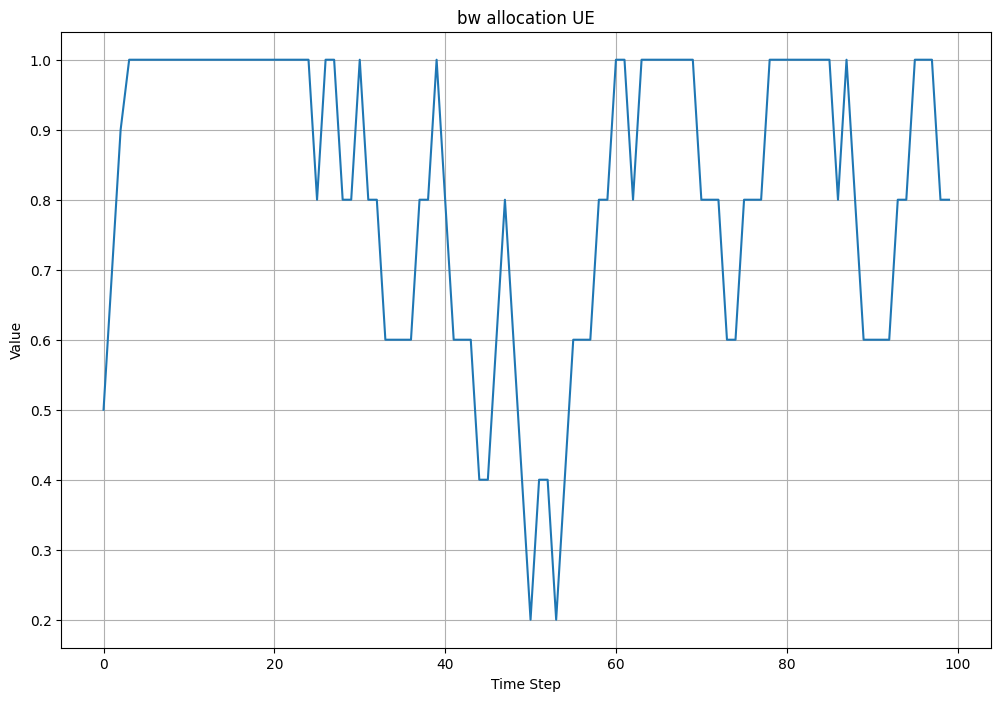

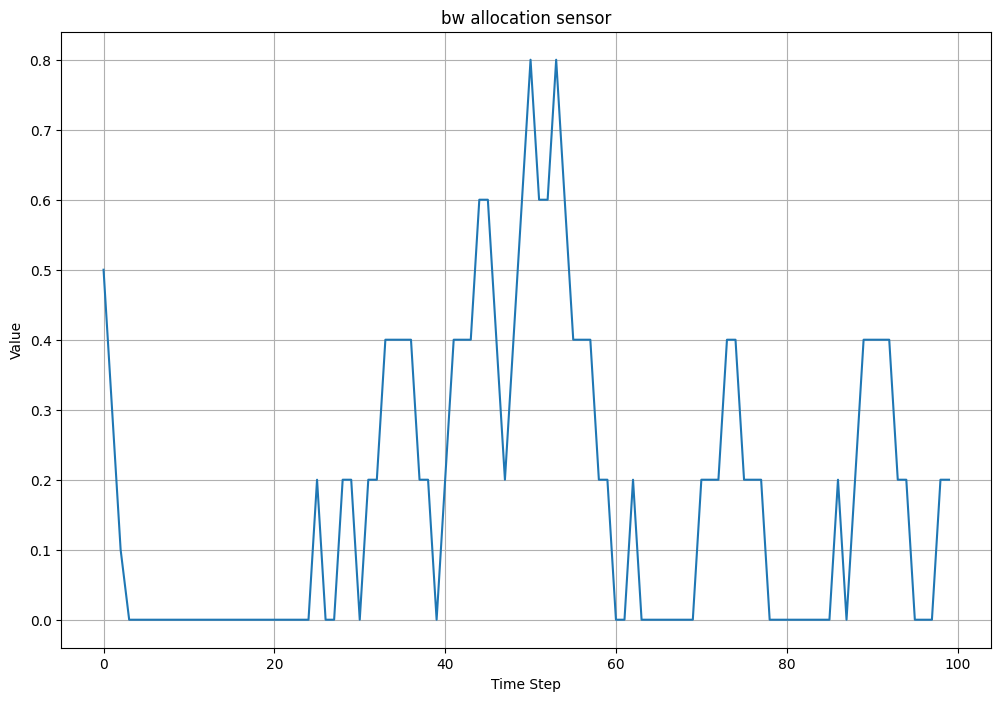

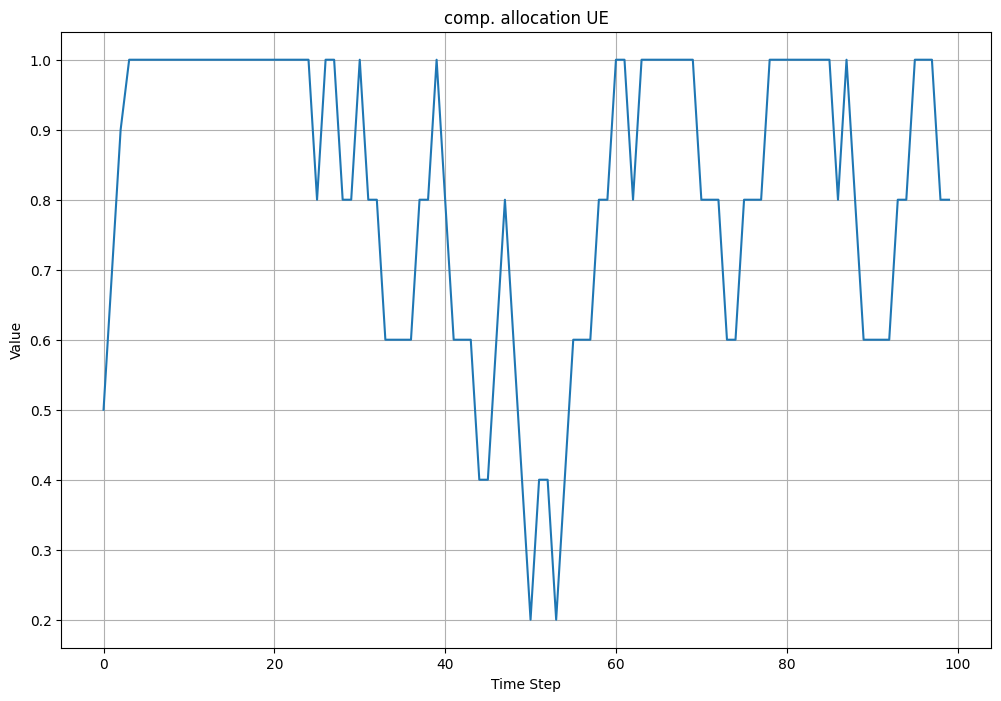

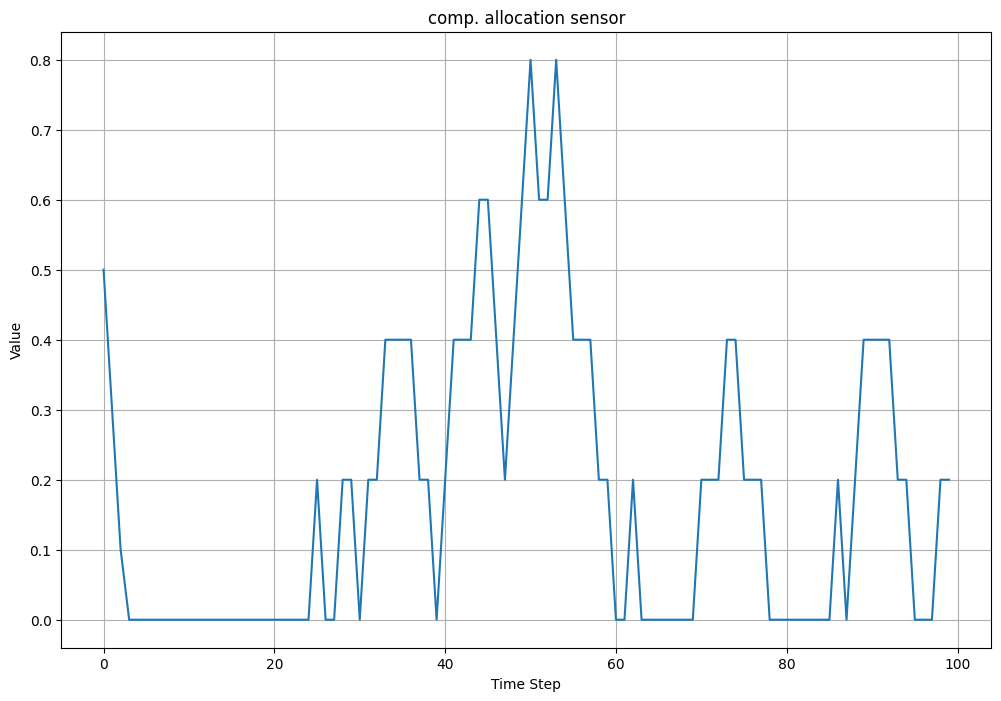

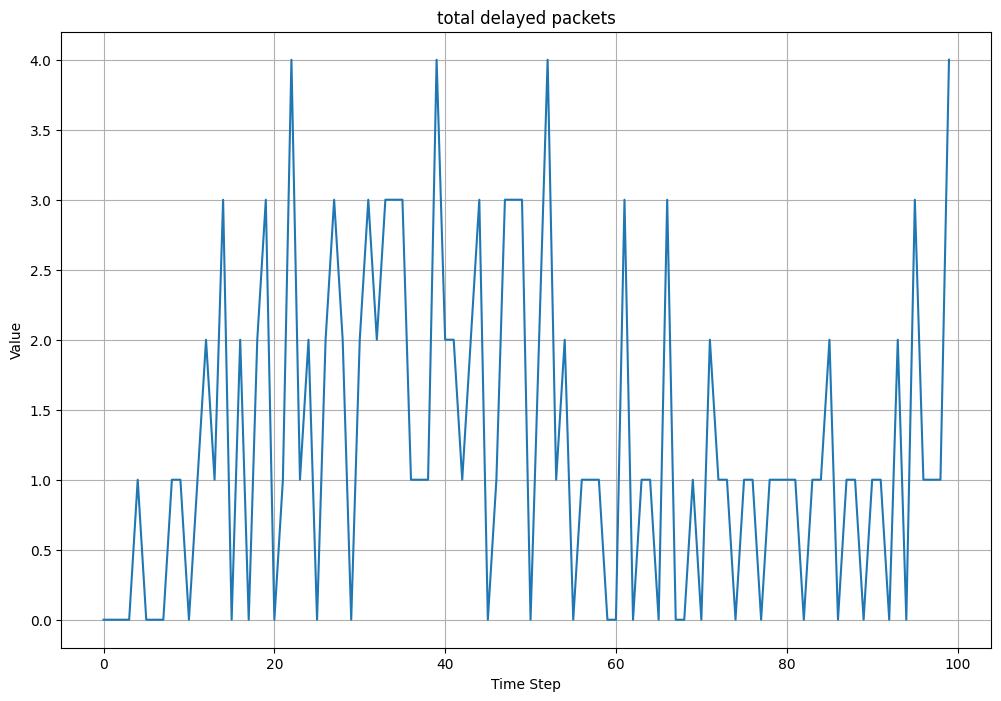

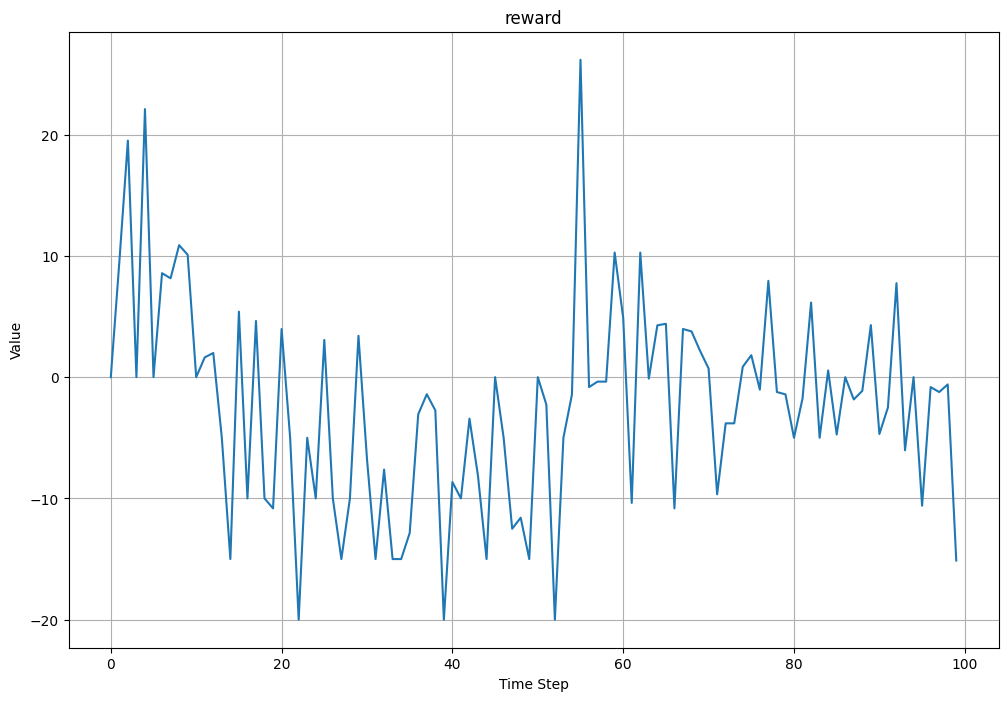

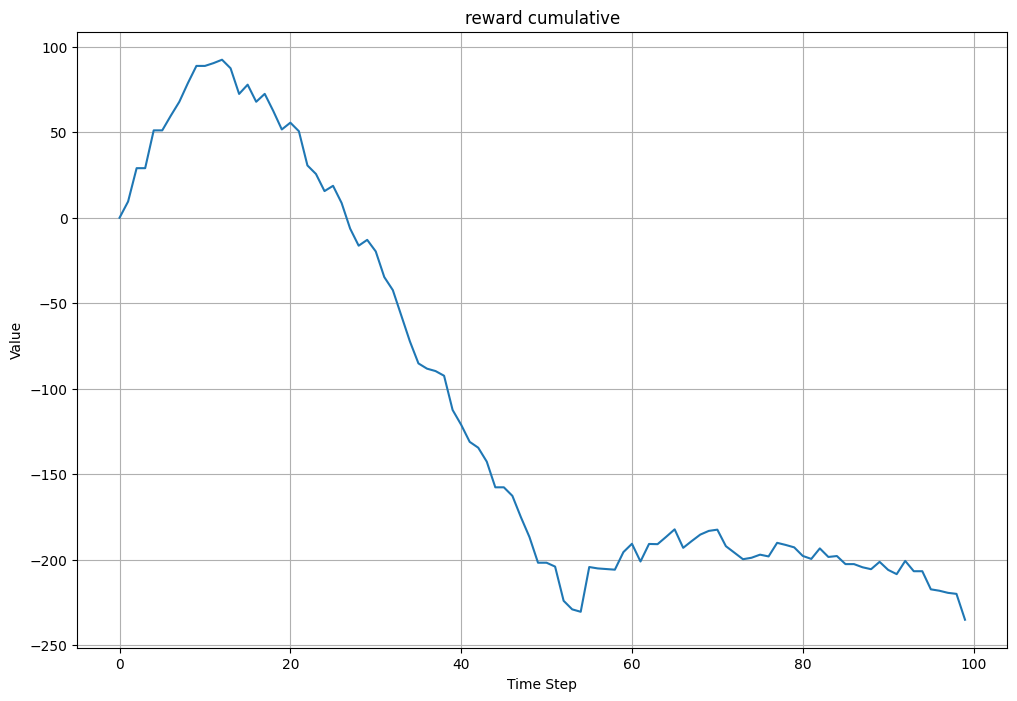

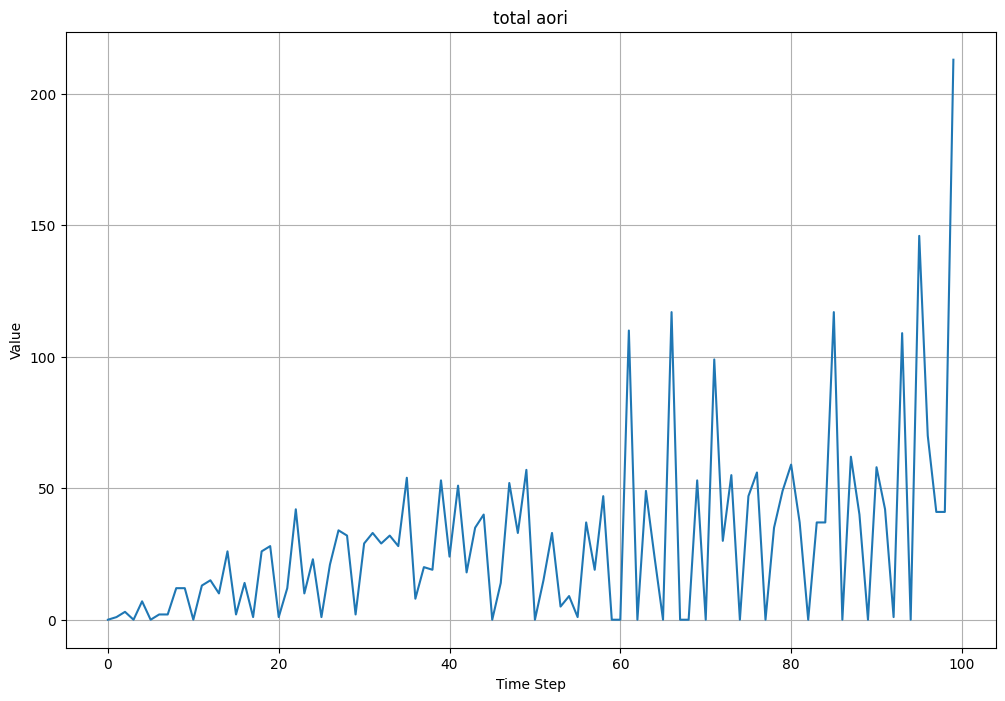

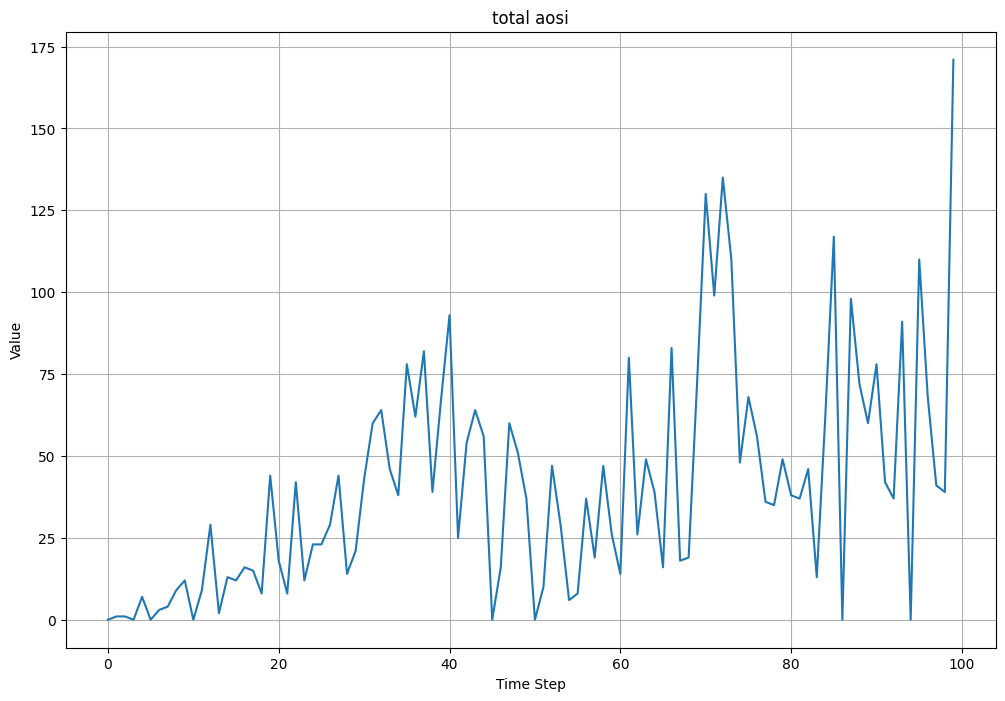

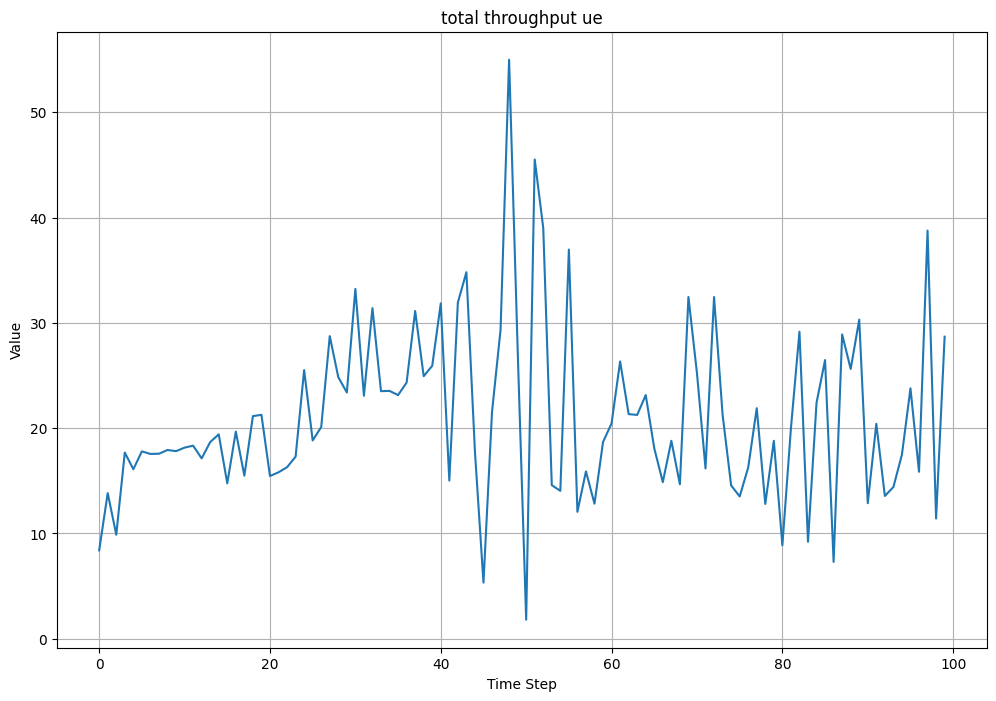

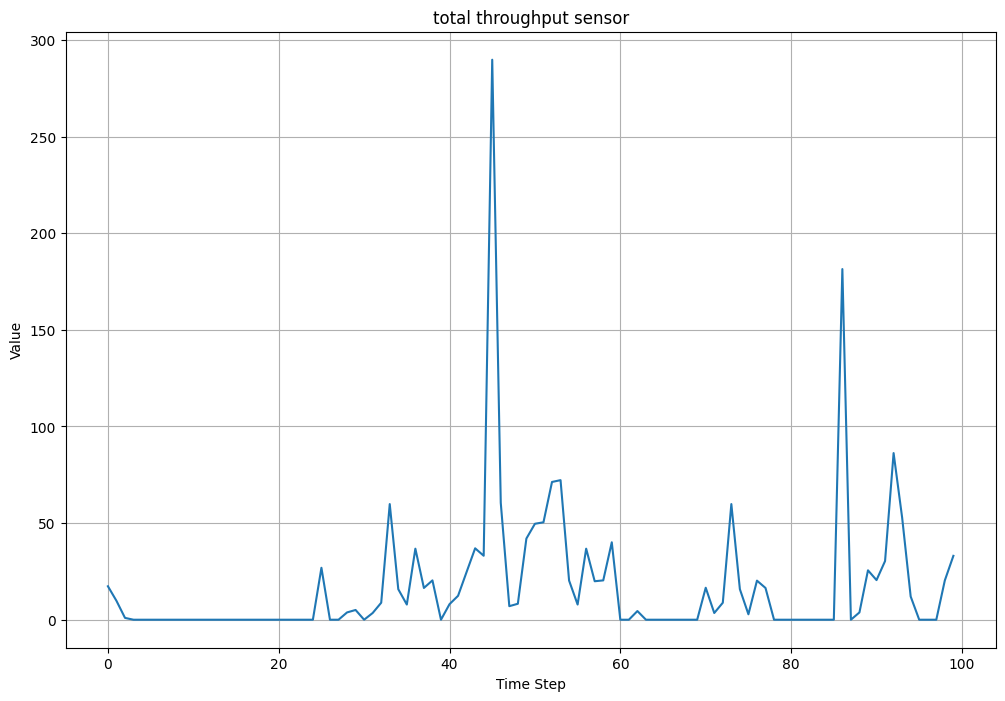

In [14]:
import matplotlib.pyplot as plt

def plot_kpi_metrics():
    # Plot kpi metrics
    for metric in kpi_results.columns:
        plt.figure(figsize=(12, 8))
        kpi_results[metric].plot()
        plt.title(f"{metric}")
        plt.xlabel("Time Step")
        plt.ylabel("Value")
        plt.grid(True)
        plt.show()

plot_kpi_metrics()

In [15]:
import pandas as pd
import time

# Parameters
aori_threshold = 20.0
throughput_threshold = 25.0

running_avg_aori = 0.0
running_avg_throughput_ue = 0.0

aori_alpha = 0.1
throughput_alpha = 0.1

dummy_action = [0.50, 0.50]
delta_change = 0.2

# Reset environment and initialize variables
done = False
obs, info = env.reset()
all_kpi_means = []  # List to store mean metrics for each episode
episode_infos = []

# Run for 100 time steps for 100 episodes
for episode in range(100):
    obs, info = env.reset()
    print(f"Starting Episode {episode + 1}")
    episode_start_time = time.time()  # Start timing the episode

    for t in range(100):
        obs, reward, terminated, truncated, info = env.step(tuple(dummy_action))

        # Get metrics from the environment
        _, kpi_results, _, _, _ = env.monitor.load_results()
        current_aori = kpi_results["total aori"].iloc[-1]
        current_throughput_ue = kpi_results['total throughput ue'].iloc[-1]

        data = kpi_results.agg(['mean'])
        running_avg_aori = data["total aori"]
        running_avg_throughput_ue = data["total throughput ue"]

        # Adjust resources based on thresholds
        if current_aori > aori_threshold:
            print(f"Time {t}: Doubling Sensor BW and CPU due to high AoI {running_avg_aori}")
            dummy_action[0] = max(0, dummy_action[0] - delta_change)
            dummy_action[1] = max(0, dummy_action[1] - delta_change)

        if current_throughput_ue < throughput_threshold:
            print(f"Time {t}: Doubling User BW and CPU due to low throughput {running_avg_throughput_ue}")
            dummy_action[0] = min(1, dummy_action[0] + delta_change)
            dummy_action[1] = min(1, dummy_action[1] + delta_change)

        if terminated or truncated:
            break
    
    # Calculate and store the episode duration
    episode_duration = time.time() - episode_start_time
    print(f"Completed Episode {episode + 1}: {episode_duration}")

    # Load results after the episode
    _, kpi_results, _, _, _ = env.monitor.load_results()

    # Compute mean of metrics over the episode
    kpi_mean = kpi_results.mean()  # Calculate mean for each metric
    all_kpi_means.append(kpi_mean)

    # Add episode-level information to the list
    episode_info = {
        "Episode": episode + 1,
        "Total Reward": info.get("episode reward"),
        "Queue Size Transferred Jobs UE": info.get("bs trans. ue"),
        "Queue Size Transferred Jobs Sensor": info.get("bs trans. ss"),
        "Queue Size Accomplished Jobs UE": info.get("bs accomp. us"),
        "Queue Size Accomplished Jobs Sensor": info.get("bs accomp. ss"),
    }
    episode_infos.append(episode_info)

    print(f"Mean Reward for Episode: {episode_info['Total Reward']/100:.2f}")


# Convert all_kpi_means and episode_infos to DataFrames
episode_infos_df = pd.DataFrame(episode_infos)
all_kpi_means_df = pd.DataFrame(all_kpi_means)

# Display mean KPI metrics for each episode
print(episode_infos_df)
print(all_kpi_means_df)

# Save results to CSV files
episode_infos_df.to_csv("episode_infos.csv", index=False)
all_kpi_means_df.to_csv("kpi_means_per_episode.csv", index=False)

Starting Episode 1
Time 0: Doubling User BW and CPU due to low throughput mean    23.110679
Name: total throughput ue, dtype: float64
Time 2: Doubling User BW and CPU due to low throughput mean    23.434404
Name: total throughput ue, dtype: float64
Time 5: Doubling User BW and CPU due to low throughput mean    26.000972
Name: total throughput ue, dtype: float64
Time 8: Doubling User BW and CPU due to low throughput mean    25.972719
Name: total throughput ue, dtype: float64
Time 9: Doubling User BW and CPU due to low throughput mean    24.914301
Name: total throughput ue, dtype: float64
Time 11: Doubling User BW and CPU due to low throughput mean    24.751943
Name: total throughput ue, dtype: float64
Time 19: Doubling Sensor BW and CPU due to high AoI mean    4.7
Name: total aori, dtype: float64
Time 22: Doubling User BW and CPU due to low throughput mean    28.776518
Name: total throughput ue, dtype: float64
Time 23: Doubling User BW and CPU due to low throughput mean    28.537279
Nam

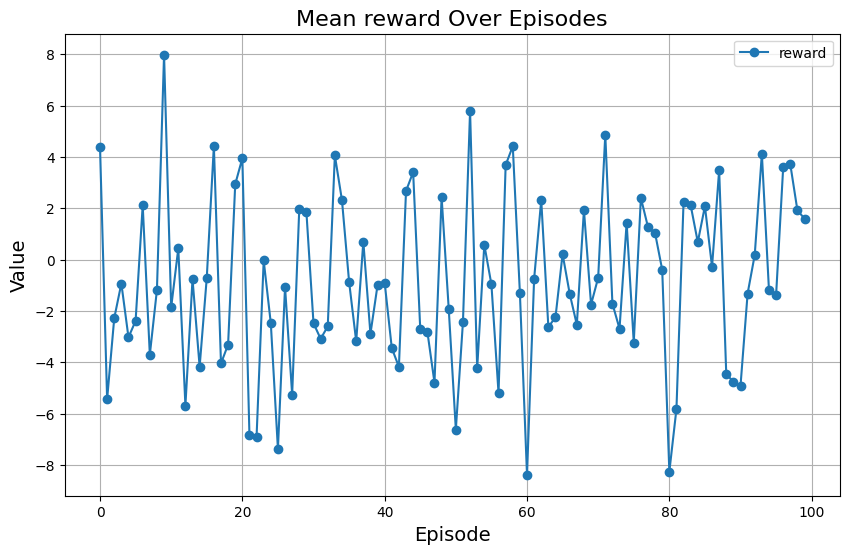

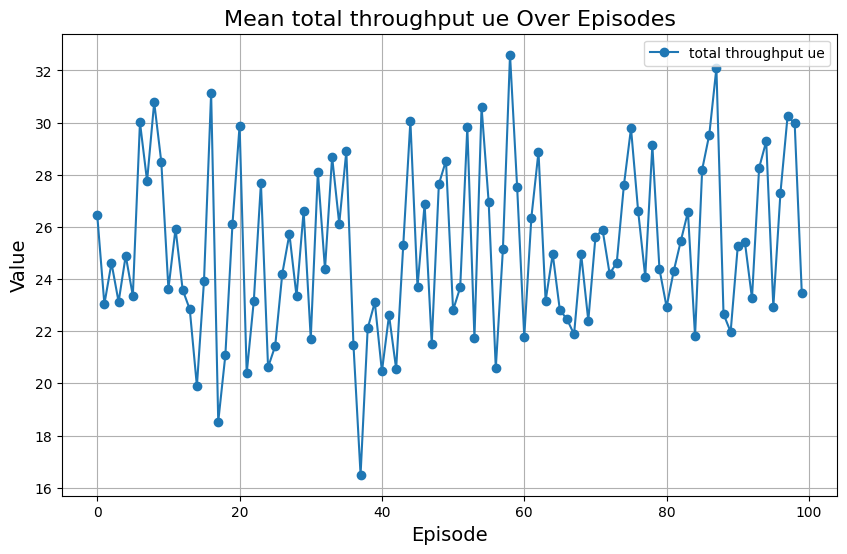

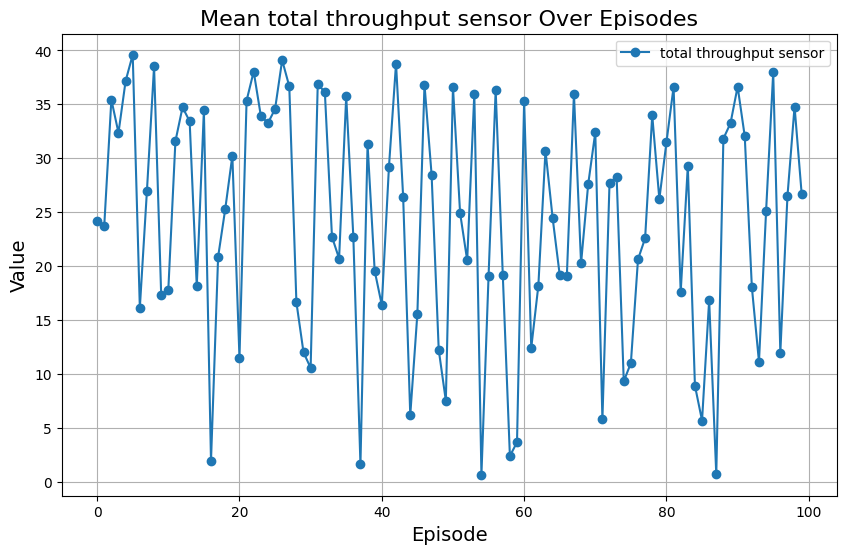

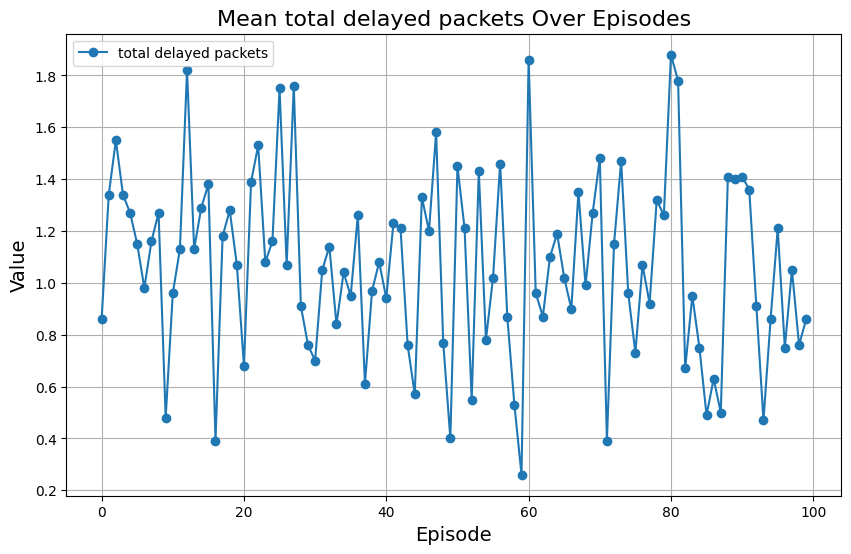

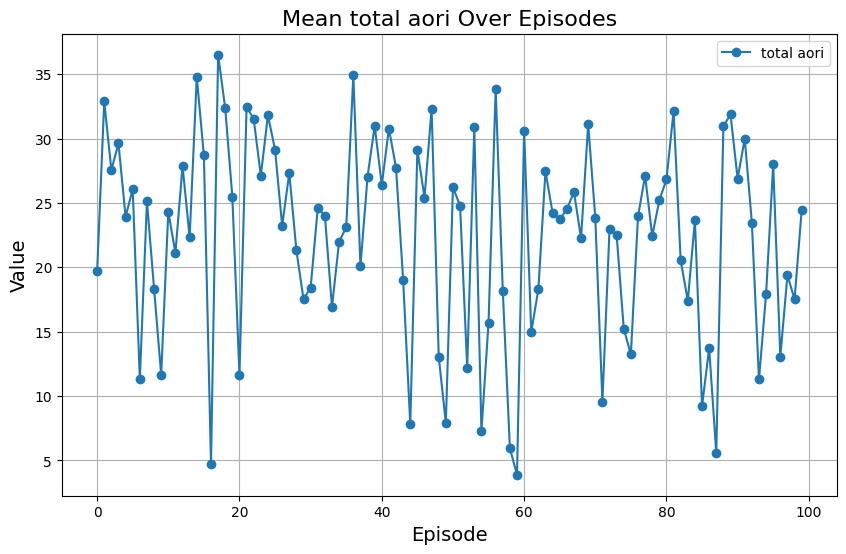

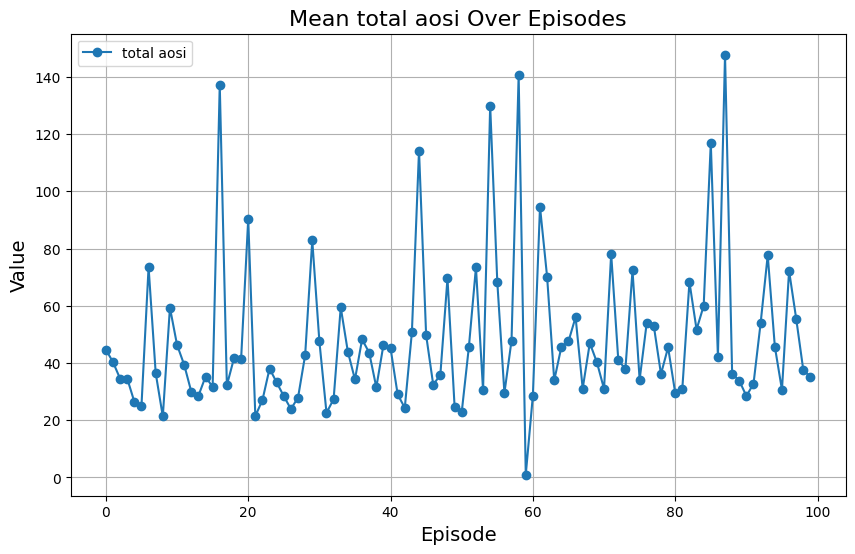

In [16]:
# Plot each metric in a separate plot
required_metrics = ["reward", "total throughput ue", "total throughput sensor", "total delayed packets", "total aori", "total aosi"]

for metric in required_metrics:
    plt.figure(figsize=(10, 6))
    plt.plot(all_kpi_means_df.index, all_kpi_means_df[metric], marker='o', label=metric)
    plt.title(f"Mean {metric} Over Episodes", fontsize=16)
    plt.xlabel("Episode", fontsize=14)
    plt.ylabel("Value", fontsize=14)
    plt.grid(True)
    plt.legend()
    plt.show()

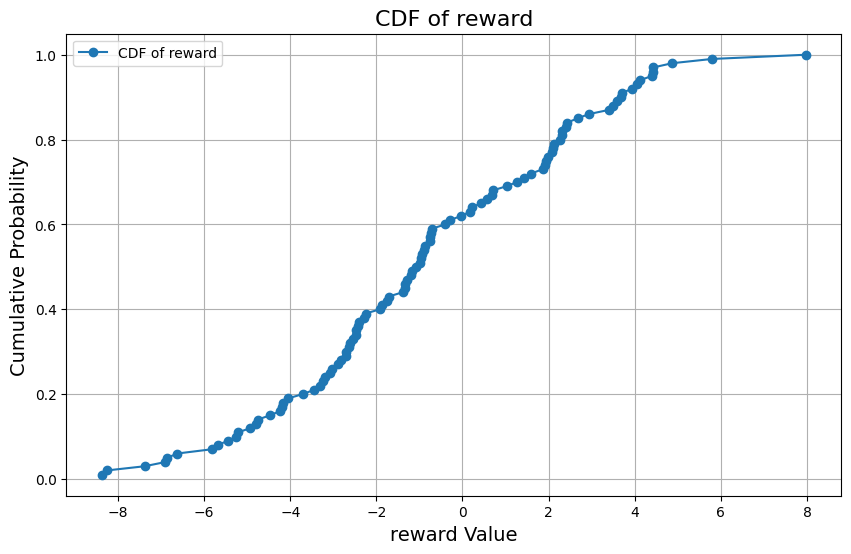

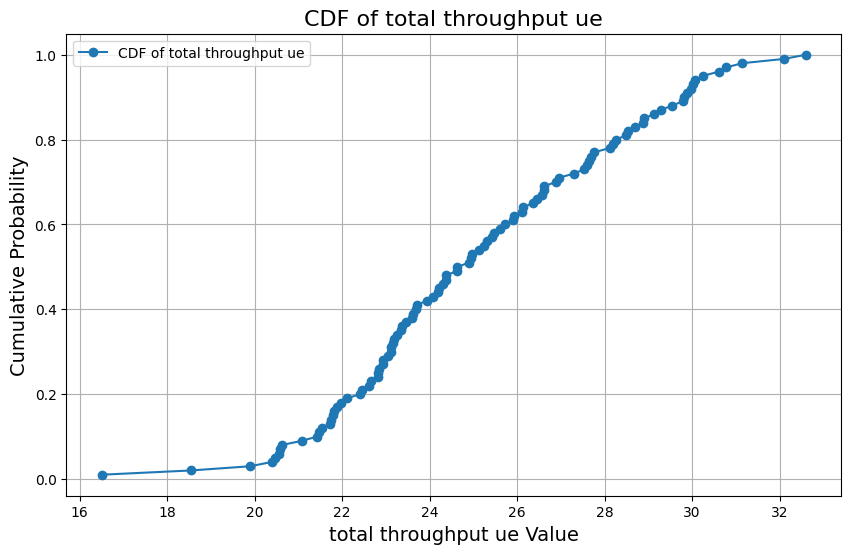

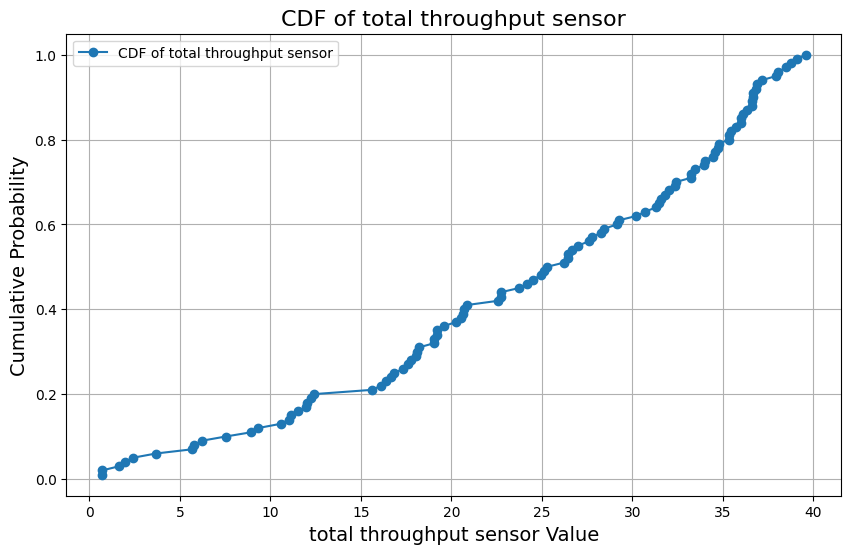

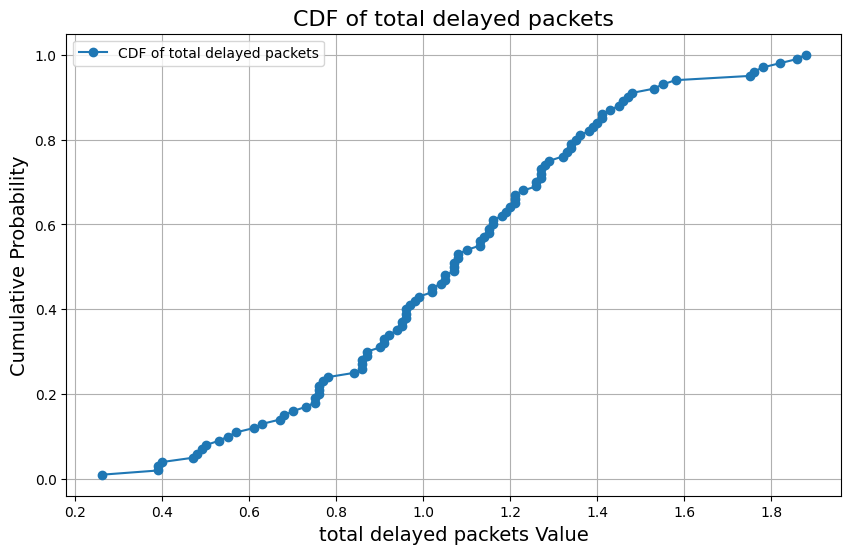

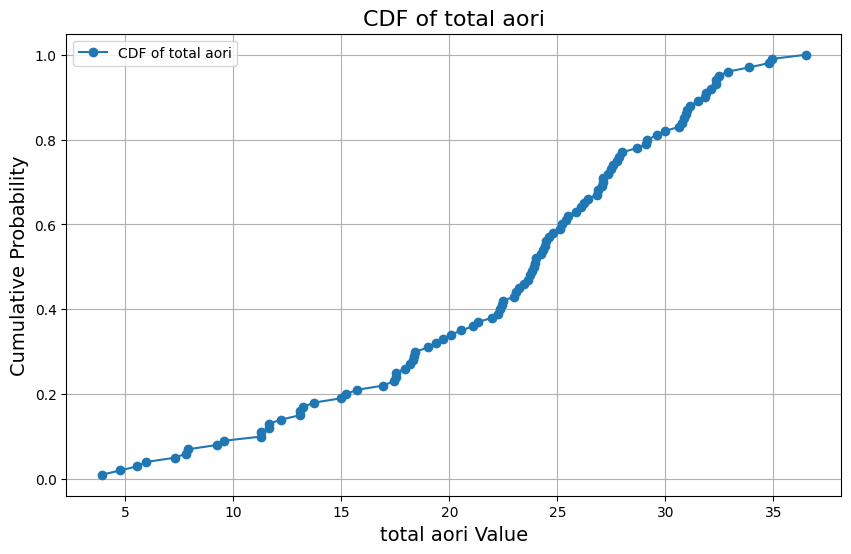

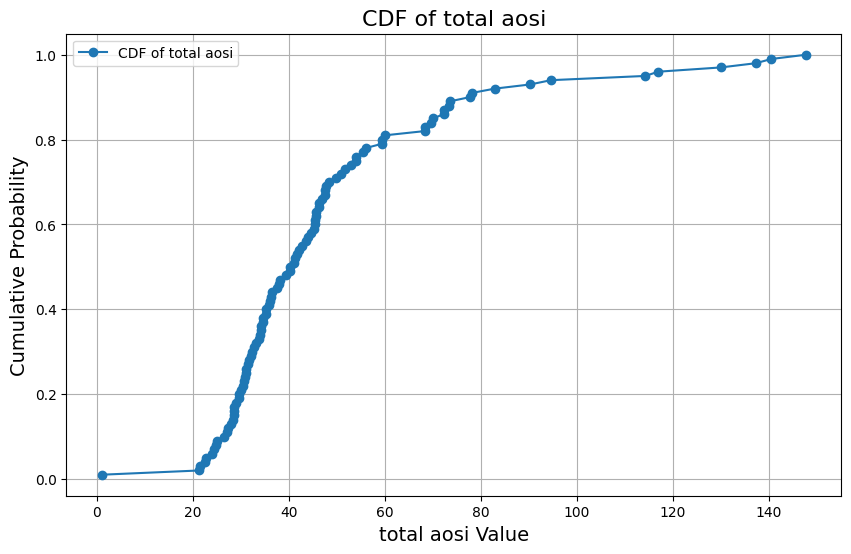

In [17]:
import numpy as np

# Function to calculate and plot the CDF for each metric
def plot_cdf_metrics(metrics_df, metrics_list):
    for metric in metrics_list:
        plt.figure(figsize=(10, 6))
        
        # Get the values for the metric
        metric_values = metrics_df[metric].dropna().values  # Drop NaN values
        
        # Sort the values and compute the CDF
        sorted_values = np.sort(metric_values)
        cdf = np.arange(1, len(sorted_values) + 1) / len(sorted_values)
        
        # Plot the CDF
        plt.plot(sorted_values, cdf, marker='o', label=f"CDF of {metric}")
        plt.title(f"CDF of {metric}", fontsize=16)
        plt.xlabel(f"{metric} Value", fontsize=14)
        plt.ylabel("Cumulative Probability", fontsize=14)
        plt.grid(True)
        plt.legend()
        plt.show()

# Metrics to plot
required_metrics = ["reward", "total throughput ue", "total throughput sensor", "total delayed packets", "total aori", "total aosi"]

# Call the CDF plot function
plot_cdf_metrics(all_kpi_means_df, required_metrics)
